In [1]:
from numpy import dot, multiply, diag, power

from importlib import reload
import dmd
reload(dmd)
from dmd import *

(80, 100)


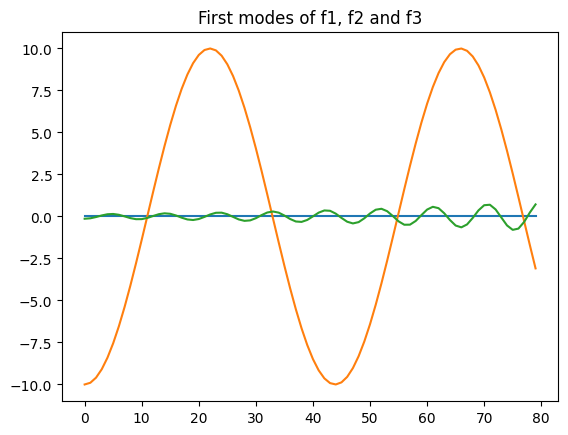

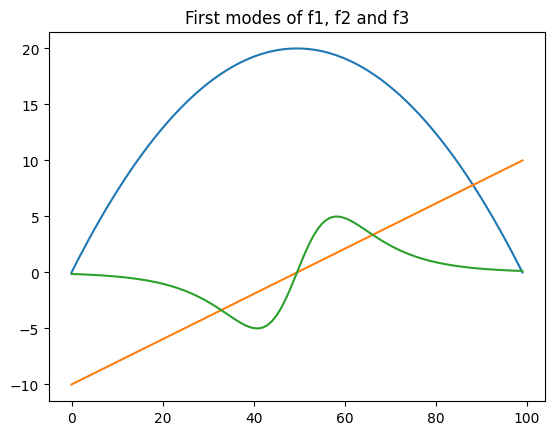

In [6]:
# define time and space domains
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 6*pi, 80)
dt = t[2] - t[1]
Xm,Tm = np.meshgrid(x, t)

# create three spatiotemporal patterns
f1 = (20-0.2*Xm**2) * exp((2.3j)*Tm)
f2 = multiply(Xm, exp(0.6j*Tm))
f3 = multiply(5*multiply(1/cosh(Xm/2), tanh(Xm/2)), 2*exp((0.1+2.8j)*Tm))

# combine signals and make data matrix
D = (f1 + f2 + f3).T #+ np.random.random(size=f1.shape[1]*f1.shape[0]).reshape((f1.shape[1],f1.shape[0]))

# create DMD input-output matrices
X = D[:,:-1]
Y = D[:,1:]

print(f1.shape)

plt.title('First modes of f1, f2 and f3')
plt.plot(np.real(f1[:,0]))
plt.plot(np.real(f2[:,0]))
plt.plot(np.real(f3[:,0]))
plt.show()

plt.title('First modes of f1, f2 and f3')
plt.plot(np.real(f1[0]))
plt.plot(np.real(f2[0]))
plt.plot(np.real(f3[0]))
plt.show()

In [10]:
A = DMD(X, Y, r=3)

XR = np.zeros(shape=(100,80)).astype(complex)
XR[:,0] = D[:,0]

for t in range(1,80):
    Xt = XR[:,t-1].reshape(100,1)
    Xt1 = A @ Xt
    Xt1
    XR[:,t] = Xt1.flatten()

np.allclose(XR, D)

True

### Test 2

(3, 100)


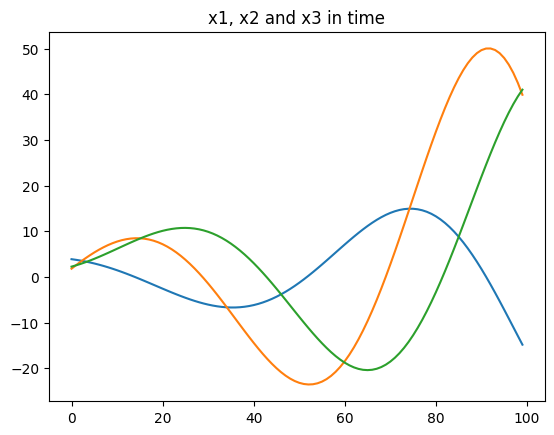

In [16]:
# define time and space domains
x10 = 4
x20 = 1
x30 = 2

def dx1_dt(x1,x2,x3):
    return -0.01*x1 -0.02*x2 -0.03*x3 #+ 0.1*np.sin(x1)

def dx2_dt(x1,x2,x3):
    return 0.2*x1

def dx3_dt(x1,x2,x3):
    return 0.05*x1 + 0.05*x2

def generate_data():
    D = []
    x1 = x10
    x2 = x20
    x3 = x30
    for i in range(100):
        x1,x2,x3 = x1 + dx1_dt(x1,x2,x3), x2 + dx2_dt(x1,x2,x3), x3 + dx3_dt(x1,x2,x3)
        D.append([x1,x2,x3])
    D = np.array(D)
    return D.T

# combine signals and make data matrix
D = generate_data()

# create DMD input-output matrices
X = D[:,:-1]
Y = D[:,1:] - X

print(D.shape)

# print(f1.shape)

plt.title('x1, x2 and x3 in time')
plt.plot(D[0])
plt.plot(D[1])
plt.plot(D[2])
plt.show()

In [17]:
A2 = DMD(X, Y, r=10)

XR = np.zeros(shape=(3,100))
XR[:,0] = D[:,0]

for t in range(1,100):
    Xt = XR[:,t-1].reshape(3,1)
    Xt1 = Xt + A2 @ Xt
    Xt1
    XR[:,t] = Xt1.flatten()

np.allclose(XR, D)

C:\Users\felip\AppData\Local\Temp\ipykernel_11156\767437968.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  XR[:,t] = Xt1.flatten()


True